# Bispec
A Tool to handle cosmological density fields, perform power spectrum and bispectrum

Contact: cfpark00@gmail.com

### Installation:
-Bispec is fully written in C++

-This tutorial is for the Python wrapper, which just runs the scripts

-To compile the code:

```
cd ./src
make
```

-To clean the make:

```
cd ./src
make clean
```
-This notebook will serve as documentation for options for the C++ code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess

### BispecPy is the Python wrapper for the compiler C++ code. No computation is done in Python

In [2]:
import BispecPy

### fullrun

-Makes a Gaussian density field, estimates the power spectrum and optionally make the realspace realisation and the NAIVE(VERY SLOW) bispectrum

The option only_command prints out the command to run in the terminal to get the same result

Remember that the command runs in src

In [3]:
BispecPy.fullrun(nside=64,realspace=True,doPk=True,doBk=False
                        ,Pkfilename=""
                        ,filenamek="./src/data/delta_k.dat",filenamePk="./data/pk.dat",filenameBk="./data/bk.dat"
                        ,filenamer="./src/data/delta.dat"
                        ,quiet=False,n_thread=None,only_command=True)

./src/fullrun -nside 64 -Pkfilename  -filenamek ./src/data/delta_k.dat -filenamer ./src/data/delta.dat -filenamePk ./data/pk.dat -filenameBk ./data/bk.dat -realspace


Now lets actually run it. Note that doBK is True and the Naive estimator is VERY slow

In [4]:
BispecPy.fullrun(nside=64,realspace=True,doPk=True,doBk=True
                        ,Pkfilename=""
                        ,filenamek="./src/data/delta_k.dat",filenamePk="./src/data/pk.dat",filenameBk="./src/data/bk.dat"
                        ,filenamer="./src/data/delta.dat"
                        ,quiet=False,n_thread=None,only_command=False)

Starting Program
--------------

nside=64
filenamek=./src/data/delta_k.dat
will also save realspace as filenamer=./src/data/delta.dat
 Time: 2.59876e-05
Start program at: 2.59876e-05 Time: 2.00272e-05
Start filling at: 4.60148e-05 Time: 0.00588202
Start delta_k write at: 0.00592804 Time: 0.00110483
Start Pk: 0.00703287 Time: 0.0022912
Start Bk: 0.00932407 Time: 5.84209
Start Bk write at: 5.85141 Time: 0.000138044
Start FFT at: 5.85155 Time: 0.00148797
Start delta write at: 5.85304 Time: 0.001127
Start Closing: 5.85417 Time: 0.000153065

Run successful. 5.85432
--------------

Total Time: 5.85433



### powerspectrum

-Simple Power Spectrum estimator

In [5]:
BispecPy.powerspectrum(nside=64,filename="./src/data/delta_k.dat",only_command=False)

Starting Program
--------------

nside=64
From filenamek=./src/data/delta_k.dat
 Time: 2.19345e-05
Start program at: 2.19345e-05 Time: 0.000845194
Start Pk: 0.000867128 Time: 0.00738382
Start Closing: 0.00825095 Time: 8.60691e-05

Run successful. 0.00833702
--------------

Total Time: 0.00834394



Plot the Powerspectrum

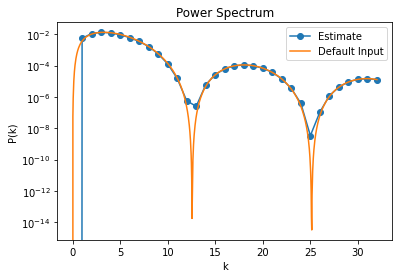

In [6]:
BispecPy.plotPk(filename="./src/data/pk.dat",nside=64,inputPK="default")

### bispectrum

-Implements the FFT bispectrum estimator from Jeong, Donghui. (2010). Cosmology with high (z>1) redshift galaxy surveys. 

In [7]:
BispecPy.bispectrum(nside=64,filename="./src/data/delta_k.dat"
                    ,filenameBk="./src/data/bk.dat",filenameBkind="./src/data/bkinds.dat"
                    ,only_command=False)

Starting Program
--------------

nside=64
From filenamek=./src/data/delta_k.dat
 Time: 2.81334e-05
Start program at: 2.81334e-05 Time: 0.000952959
Start Bk: 0.000981092T0
T1
T2
T3
T4
 Time: 1.31334
Start Bk write at: 1.31432 Time: 0.000161171
Start Bkind write at: 1.31448 Time: 9.08375e-05

Run successful. 1.31457
--------------

Total Time: 1.31458



Plot the Bispectrum, this is a binned image

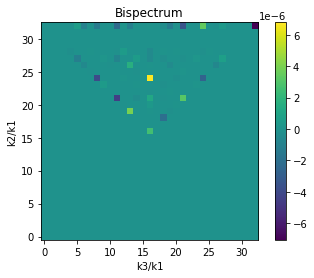

In [8]:
BispecPy.plotBk(filenameBk="./src/data/bk.dat",filenameBkind="./src/data/bkinds.dat",nside=64)

It essentially gives zero since we are dealing with a Gaussian field

Let's repeat with a non-gaussian field. We just make a simple random field

In [9]:
fieldcustom=1+np.random.random((64,64,64))*0.3
fieldcustom=fieldcustom.astype(np.float64)
fieldcustom.tofile("./src/data/randomfield.dat")

Use quiet

In [10]:
BispecPy.bispectrum(nside=64,filename="./src/data/randomfield.dat"
                    ,filenameBk="./src/data/random_bk.dat"
                    ,filenameBkind="./src/data/random_bkinds.dat"
                    ,only_command=False,quiet=True)

T0
T1
T2
T3
T4



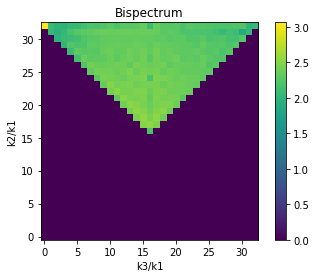

In [11]:
BispecPy.plotBk(filenameBk="./src/data/random_bk.dat"
                ,filenameBkind="./src/data/random_bkinds.dat"
                ,nside=64)

### memory_estimate

-This Python function estimates the rough memory consumption

In [12]:
BispecPy.memory_estimate(nside=256,numks=80)

These are rough estimates for nside=256

fullrun
  -default: 0.27 GB
  -realspace: 0.47 GB
gaussianfield
  -default: 0.27 GB
  -realspace: 0.40 GB
powerspectrum
  -default: 0.13 GB
bispectrum for 80 ks, thus 88560 triplets.
  -default: 32.35 GB
bispectrum_naive
  -default: 0.27 GB


### Some more tools for plotting

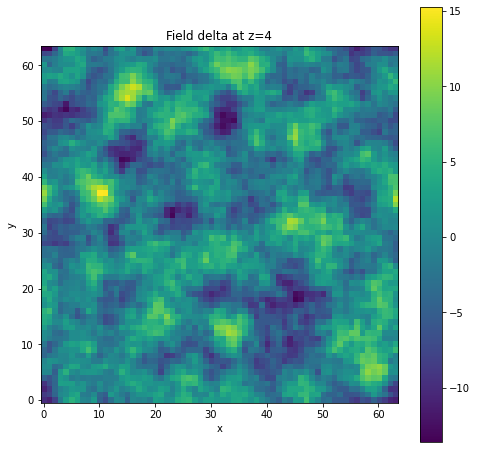

In [13]:
BispecPy.plotrfield(filename="./src/data/delta.dat",nside=64,z=4)

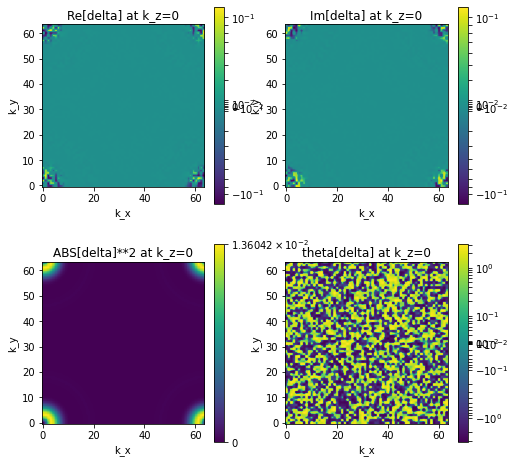

In [14]:
BispecPy.plotkfield(filename="./src/data/delta_k.dat",nside=64,z=0)